In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#Libraries for hyper parameter tunning
import tensorflow as tf
from tensorflow import keras
import numpy as np
# import keras_tuner
# from keras_tuner import RandomSearch
# from keras_tuner.engine.hyperparameters import HyperParameters
#Libraries to create the model
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization, Dropout, Flatten, Dense
from keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# image_directory = "/content/images/"
images = ('/content/drive/My Drive/images')


df = pd.read_csv('/content/dataset.csv')
print(df.head(5))
print(df.columns)

  filename  Balanced  Crossbar  High Crossbar  Left Do Crossbar  \
0    0.png                   1              0                 0   
1    1.png                   1              0                 0   
2    2.png                   1              0                 0   
3    3.png                   0              0                 0   
4    4.png                   1              1                 0   

   Short Length Crossbar  Down Sloping  Right Do Crossbar  Upsloping  \
0                      1             0                  0          0   
1                      0             0                  1          1   
2                      0             0                  0          1   
3                      0             0                  1          0   
4                      0             0                  0          0   

   Lengthy Crossbar  Flat Crossbar  Low Crossbar  Medium Length Crossbar  
0                 0              1             0                       0  
1             

In [ ]:
from PIL import Image
import os

# Set the path to the image folder
img_folder = '/content/drive/My Drive/images'

# Loop through each file in the folder
for filename in os.listdir(img_folder):
    # Load the image
    img = Image.open(os.path.join(img_folder, filename))

    # Get the mode of the image (e.g. "RGB", "L=grayscale/B&W", "CMYK", etc.)
    print(f"{filename}: {img.mode}")

In [ ]:
#preparing X
X_dataset = []
for i in tqdm(range(df.shape[0])):
    img = tf.keras.utils.load_img(images +'/'+df['filename'][i], color_mode='grayscale')
    img =  tf.keras.utils.img_to_array(img)
    img = img/255
    X_dataset.append(img)
# X = np.array(X_dataset)

100%|██████████| 1996/1996 [07:29<00:00,  4.44it/s]


In [ ]:
X_dataset1 = []
for i in tqdm(range(df.shape[0])):
    img = tf.keras.utils.load_img(images +'/'+df['filename'][i], color_mode='grayscale')
 #   img_gray = tf.image.convert_image_dtype(tf.image.rgb_to_grayscale(img), tf.float32)
    img_gray =  tf.keras.utils.img_to_array(img)
    img_gray = img_gray/255.0
    X_dataset1.append(img_gray)

100%|██████████| 1996/1996 [00:02<00:00, 781.42it/s]


In [ ]:
X1 = np.array(X_dataset1)

In [ ]:
X1.shape

(1996, 28, 28, 1)

In [ ]:
X = np.array(X_dataset)

In [ ]:
X = X.astype(np.float32)

In [ ]:
print(X.shape)


(1996, 28, 28, 1)


In [ ]:
df1 = df.iloc[0:992]

In [ ]:
Y = np.array(df.drop(['filename'], axis=1))

In [ ]:
Y.shape

(1996, 11)

In [ ]:
print(df['filename'][30]) #30.png
print(df[30:31])

30.png
   filename  Balanced  Crossbar  High Crossbar  Left Do Crossbar  \
30   30.png                   0              1                 1   

    Short Length Crossbar  Down Sloping  Right Do Crossbar  Upsloping  \
30                      0             0                  0          0   

    Lengthy Crossbar  Flat Crossbar  Low Crossbar  Medium Length Crossbar  
30                 0              1             0                       1  


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=20, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
y_train[0]

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-18-2bbfbe7dae29>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
def build_model(hp):
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(11, activation='softmax')
  ])

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="T Classification")

In [ ]:
tuner_search.search(x_train,y_train,epochs=3,validation_data=(x_test, y_test))

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 48)        27696     
                                                                 
 flatten (Flatten)           (None, 23232)             0         
                                                                 
 dense (Dense)               (None, 112)               2602096   
                                                                 
 dense_1 (Dense)             (None, 11)                1243      
                                                                 
Total params: 2,632,699
Trainable params: 2,632,699
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.12))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(11, activation='sigmoid'))


In [ ]:
model.summary()

#Binary cross entropy of each label. So no really a binary classification problem but
#Calculating binary cross entropy for each label.
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0

Epoch 1/20
44/44 [==============================] - 5s 52ms/step - loss: 0.5934 - accuracy: 0.1546 - val_loss: 0.6358 - val_accuracy: 0.0384
Epoch 2/20
44/44 [==============================] - 2s 42ms/step - loss: 0.4946 - accuracy: 0.2520 - val_loss: 0.6408 - val_accuracy: 0.0384
Epoch 3/20
44/44 [==============================] - 2s 44ms/step - loss: 0.4554 - accuracy: 0.2806 - val_loss: 0.7226 - val_accuracy: 0.0684
Epoch 4/20
44/44 [==============================] - 2s 44ms/step - loss: 0.4346 - accuracy: 0.2799 - val_loss: 0.7963 - val_accuracy: 0.0684
Epoch 5/20
44/44 [==============================] - 3s 72ms/step - loss: 0.4182 - accuracy: 0.2663 - val_loss: 0.7648 - val_accuracy: 0.0835
Epoch 6/20
44/44 [==============================] - 2s 53ms/step - loss: 0.4004 - accuracy: 0.2706 - val_loss: 0.7697 - val_accuracy: 0.0968
Epoch 7/20
44/44 [==============================] - 2s 41ms/step - loss: 0.3909 - accuracy: 0.2978 - val_loss: 0.7783 - val_accuracy: 0.1302
Epoch 8/20
44

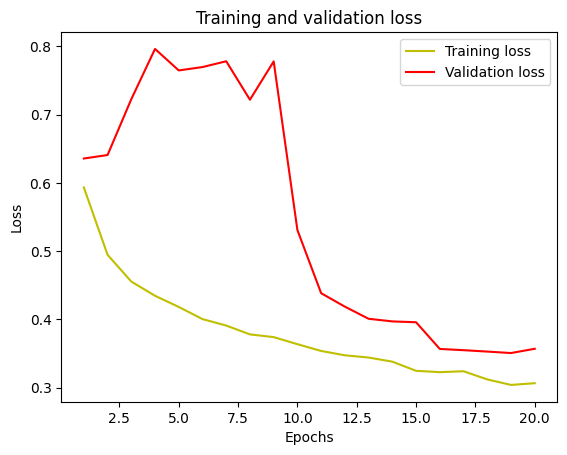

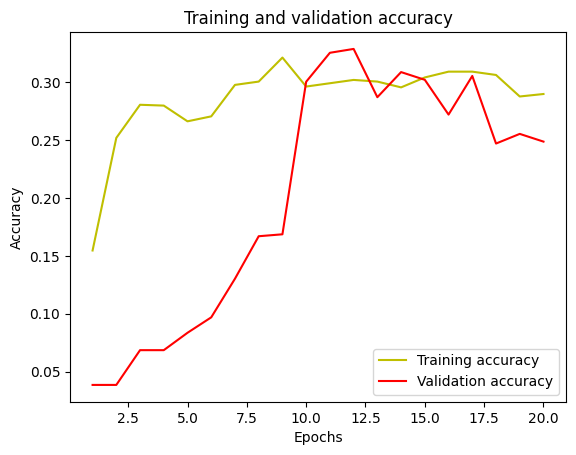

In [ ]:
import matplotlib.pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Using Transfer Learning**

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model2 = Sequential()

model2.add(conv_base)
model2.add(Flatten())
model2.add(Dense(256,activation='relu'))
model2.add(Dense(11,activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 dense_4 (Dense)             (None, 11)                2827      
                                                                 
Total params: 16,814,923
Trainable params: 16,814,923
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model2.compile(
#     optimizer=keras.optimizers.RMSprop(lr=1e-5),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
#   )


In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
44/44 [==============================] - 3s 68ms/step - loss: 0.3028 - accuracy: 0.2856 - val_loss: 0.3521 - val_accuracy: 0.2287
Epoch 2/10
44/44 [==============================] - 2s 54ms/step - loss: 0.2935 - accuracy: 0.2921 - val_loss: 0.3556 - val_accuracy: 0.2588
Epoch 3/10
44/44 [==============================] - 2s 43ms/step - loss: 0.2931 - accuracy: 0.2906 - val_loss: 0.3474 - val_accuracy: 0.2721
Epoch 4/10
44/44 [==============================] - 2s 44ms/step - loss: 0.2868 - accuracy: 0.2892 - val_loss: 0.3534 - val_accuracy: 0.2721
Epoch 5/10
44/44 [==============================] - 2s 40ms/step - loss: 0.2832 - accuracy: 0.2906 - val_loss: 0.3586 - val_accuracy: 0.2654
Epoch 6/10
44/44 [==============================] - 2s 40ms/step - loss: 0.2778 - accuracy: 0.2921 - val_loss: 0.3600 - val_accuracy: 0.2588
Epoch 7/10
44/44 [==============================] - 2s 49ms/step - loss: 0.2717 - accuracy: 0.2742 - val_loss: 0.3618 - val_accuracy: 0.2571
Epoch 8/10
44

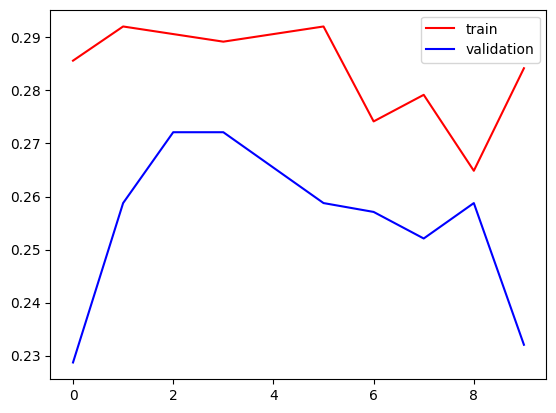

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

**Using Data Augmentation + Transfer Learning**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define your data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=5, # randomly rotate images by up to 20 degrees
    width_shift_range=0.03, # randomly shift images horizontally by up to 10%
    height_shift_range=0.03, # randomly shift images vertically by up to 10%
    shear_range=0.5, # randomly shear images by up to 20%
    zoom_range=0.5, # randomly zoom images by up to 20%
    horizontal_flip=False, # dont flip images horizontally
    vertical_flip=False, # don't flip images vertically
    fill_mode='nearest' # fill any empty pixels with the nearest available pixel
)

In [ ]:
datagen.fit(x_train)

In [ ]:
x_train.shape

(1397, 28, 28, 1)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/20
44/44 [==============================] - 4s 47ms/step - loss: 0.2692 - accuracy: 0.2813 - val_loss: 0.3663 - val_accuracy: 0.2705
Epoch 2/20
44/44 [==============================] - 2s 43ms/step - loss: 0.2612 - accuracy: 0.2770 - val_loss: 0.3626 - val_accuracy: 0.2454
Epoch 3/20
44/44 [==============================] - 2s 47ms/step - loss: 0.2526 - accuracy: 0.2806 - val_loss: 0.3742 - val_accuracy: 0.2104
Epoch 4/20
44/44 [==============================] - 3s 70ms/step - loss: 0.2497 - accuracy: 0.2513 - val_loss: 0.3741 - val_accuracy: 0.2237
Epoch 5/20
44/44 [==============================] - 2s 44ms/step - loss: 0.2507 - accuracy: 0.2777 - val_loss: 0.3814 - val_accuracy: 0.2588
Epoch 6/20
44/44 [==============================] - 2s 43ms/step - loss: 0.2494 - accuracy: 0.2699 - val_loss: 0.3810 - val_accuracy: 0.2204
Epoch 7/20
44/44 [==============================] - 2s 43ms/step - loss: 0.2364 - accuracy: 0.2598 - val_loss: 0.3886 - val_accuracy: 0.2120
Epoch 8/20
44

In [ ]:
model2.compile(
    optimizer=keras.optimizers.RMSprop(lr=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )


history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
44/44 [==============================] - 2s 41ms/step - loss: 0.2031 - accuracy: 0.2570 - val_loss: 0.4153 - val_accuracy: 0.1920
Epoch 2/10
44/44 [==============================] - 2s 43ms/step - loss: 0.2122 - accuracy: 0.2513 - val_loss: 0.4092 - val_accuracy: 0.1953
Epoch 3/10
44/44 [==============================] - 2s 43ms/step - loss: 0.1994 - accuracy: 0.2577 - val_loss: 0.4158 - val_accuracy: 0.2170
Epoch 4/10
44/44 [==============================] - 2s 40ms/step - loss: 0.1965 - accuracy: 0.2541 - val_loss: 0.4245 - val_accuracy: 0.2137
Epoch 5/10
44/44 [==============================] - 2s 41ms/step - loss: 0.1958 - accuracy: 0.2491 - val_loss: 0.4346 - val_accuracy: 0.1937
Epoch 6/10
44/44 [==============================] - 3s 60ms/step - loss: 0.1993 - accuracy: 0.2527 - val_loss: 0.4280 - val_accuracy: 0.2120
Epoch 7/10
44/44 [==============================] - 3s 58ms/step - loss: 0.2023 - accuracy: 0.2362 - val_loss: 0.4309 - val_accuracy: 0.2037
Epoch 8/10
44

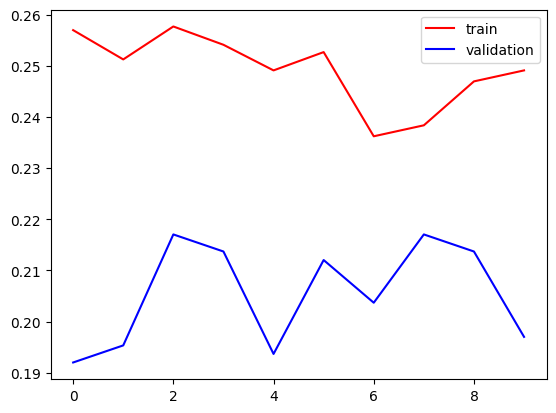

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

### Using Xception model(Transfer Learning) with Softmax at the last Layer and Focal Loss, GlobalAveragePooling instead of MAXpooling, SGD optimizer

In [ ]:
import cv2
import os
import numpy as np
input_folder = '/content/drive/My Drive/images'
output_folder = '/content/drive/My Drive/Xception preprocessed images'

In [ ]:
for filename in os.listdir(input_folder):
    img = cv2.imread(os.path.join(input_folder,filename), cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    resized_img = cv2.resize(img, (224, 224))
    cv2.imwrite(os.path.join(output_folder,filename), resized_img)

In [ ]:
#preparing X
#from tensorflow.keras.preprocessing.image.load_img import load_img
X_dataset = []
for i in tqdm(range(df.shape[0])):
    img = tf.keras.utils.load_img(output_folder +'/'+df['filename'][i])
    img =  tf.keras.utils.img_to_array(img)
    img_norm = img.astype(np.float32) / 255.0
    X_dataset.append(img_norm)
X = np.array(X_dataset)

100%|██████████| 1996/1996 [00:04<00:00, 466.43it/s]


In [ ]:
print(X.shape)

(1996, 224, 224, 3)


In [ ]:
model11 = Sequential()
model11.add(Conv2D(64, kernel_size = (3,3),activation='relu',input_shape=(28,28,1)))
model11.add(Conv2D(64, kernel_size = (3,3),activation='relu'))
model11.add(Conv2D(128, kernel_size = (3,3),activation='relu'))
model11.add(Conv2D(256, kernel_size = (3,3),activation='relu'))
model11.add(Conv2D(1024, kernel_size = (3,3),activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(BatchNormalization())
model11.add(Dropout(0.25))
model11.add(Flatten())
model11.add(Dense(512, activation='relu'))
model11.add(BatchNormalization())
model11.add(Dropout(0.5))
model11.add(Dense(11, activation='softmax'))

In [ ]:
model11.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

history = model11.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/20
57/57 [==============================] - 20s 54ms/step - loss: 19.3074 - accuracy: 0.2684 - val_loss: 24.2185 - val_accuracy: 0.2550
Epoch 2/20
57/57 [==============================] - 2s 41ms/step - loss: 27.8070 - accuracy: 0.2533 - val_loss: 41.8671 - val_accuracy: 0.1950
Epoch 3/20
57/57 [==============================] - 2s 42ms/step - loss: 38.3817 - accuracy: 0.2622 - val_loss: 62.5967 - val_accuracy: 0.2150
Epoch 4/20
57/57 [==============================] - 2s 40ms/step - loss: 46.5522 - accuracy: 0.2628 - val_loss: 98.7311 - val_accuracy: 0.2400
Epoch 5/20
57/57 [==============================] - 2s 38ms/step - loss: 56.5254 - accuracy: 0.2795 - val_loss: 108.9924 - val_accuracy: 0.1500
Epoch 6/20
57/57 [==============================] - 2s 38ms/step - loss: 68.2079 - accuracy: 0.2634 - val_loss: 132.0730 - val_accuracy: 0.1250
Epoch 7/20
57/57 [==============================] - 2s 38ms/step - loss: 83.6504 - accuracy: 0.2706 - val_loss: 214.4657 - val_accuracy: 0.

In [ ]:
score = model11.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

In [ ]:
from keras.applications.xception import Xception
import tensorflow as tf
from tensorflow.keras import backend as K

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.15)(x)
predictions = Dense(11, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
def focal_loss1(gamma=2., alpha=.25):
    def focal_loss_func(y_true, y_pred):
        # Define epsilon to avoid dividing by zero
        epsilon = K.epsilon()
        # Define y_pred_clipped to avoid log(0) error
        y_pred_clipped = K.clip(y_pred, epsilon, 1. - epsilon)
        # Cast y_true to float32 to match y_pred_clipped's datatype
        y_true = K.cast(y_true, K.floatx())
        # Calculate cross entropy loss
        cross_entropy_loss = -y_true * K.log(y_pred_clipped)
        # Calculate weight factor
        weight = alpha * y_true * K.pow((1 - y_pred_clipped), gamma)
        # Calculate focal loss
        focal_loss = weight * cross_entropy_loss
        # Return the focal loss
        return K.sum(focal_loss, axis=1)
    return focal_loss_func


In [ ]:
from keras.optimizers import SGD

sgd = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=sgd, loss=focal_loss1(), metrics=['accuracy'])


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=20, test_size = 0.10)
x_train.shape

(1796, 224, 224, 3)

In [ ]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/20
57/57 [==============================] - 25s 190ms/step - loss: 1.6092 - accuracy: 0.0713 - val_loss: 1.6183 - val_accuracy: 0.0550
Epoch 2/20
57/57 [==============================] - 9s 162ms/step - loss: 1.5480 - accuracy: 0.0841 - val_loss: 1.5770 - val_accuracy: 0.0850
Epoch 3/20
57/57 [==============================] - 9s 158ms/step - loss: 1.5174 - accuracy: 0.1013 - val_loss: 1.5482 - val_accuracy: 0.0700
Epoch 4/20
57/57 [==============================] - 9s 160ms/step - loss: 1.4906 - accuracy: 0.1141 - val_loss: 1.5274 - val_accuracy: 0.0750
Epoch 5/20
57/57 [==============================] - 9s 158ms/step - loss: 1.4725 - accuracy: 0.1281 - val_loss: 1.5089 - val_accuracy: 0.0900
Epoch 6/20
57/57 [==============================] - 9s 162ms/step - loss: 1.4608 - accuracy: 0.1247 - val_loss: 1.4963 - val_accuracy: 0.0750
Epoch 7/20
57/57 [==============================] - 9s 161ms/step - loss: 1.4465 - accuracy: 0.1359 - val_loss: 1.4839 - val_accuracy: 0.0850
Epoch

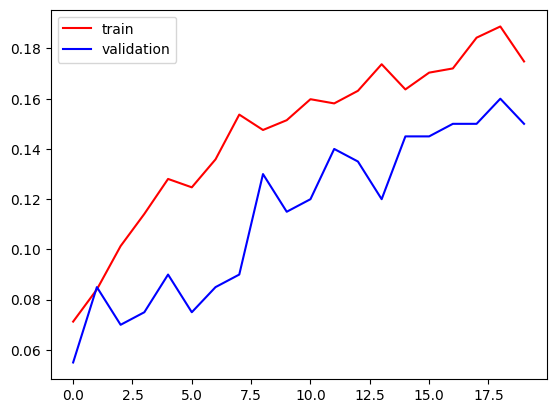

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Using Softmax with the previous model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X1, Y, random_state=20, test_size = 0.10)
x_train.shape

(1796, 28, 28, 1)

In [ ]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation="relu", input_shape=(28,28,1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.15))

model3.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.15))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.12))

model3.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.12))

model3.add(Flatten())
model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(11, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0

In [ ]:
from keras.optimizers import SGD

sgd = SGD(lr=0.001, momentum=0.9)
model3.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model3.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/20
57/57 [==============================] - 4s 15ms/step - loss: 0.6763 - accuracy: 0.0880 - val_loss: 0.6812 - val_accuracy: 0.0350
Epoch 2/20
57/57 [==============================] - 0s 6ms/step - loss: 0.6494 - accuracy: 0.0735 - val_loss: 0.6599 - val_accuracy: 0.0350
Epoch 3/20
57/57 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.0713 - val_loss: 0.6390 - val_accuracy: 0.0350
Epoch 4/20
57/57 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.0635 - val_loss: 0.6241 - val_accuracy: 0.0350
Epoch 5/20
57/57 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.0668 - val_loss: 0.6153 - val_accuracy: 0.0350
Epoch 6/20
57/57 [==============================] - 0s 6ms/step - loss: 0.5943 - accuracy: 0.0674 - val_loss: 0.6096 - val_accuracy: 0.0350
Epoch 7/20
57/57 [==============================] - 0s 6ms/step - loss: 0.5879 - accuracy: 0.0718 - val_loss: 0.6051 - val_accuracy: 0.0350
Epoch 8/20
57/57 [=